## Object Detection On Command
---


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Understand PASCAL VOC 2012 Data

### Combining annotation files into one CSV file

PASCAL VOC 2012 dataset has corresponding .xml file with annotation for each image jpg file.
Due to its complexity, we need to combine all these .xml files into one single csv file via panda modules.


In [3]:
dir_anno = "/home/ubuntu/VOCdevkit/VOC2012/Annotations/"
img_dir  = "/home/ubuntu/VOCdevkit/VOC2012/JPEGImages/"

In [4]:
import os 
import numpy as np
import xml.etree.ElementTree as ET
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd 

def extract_single_xml_file(tree):
    Nobj = 0
    row  = OrderedDict()
    for elems in tree.iter():

        if elems.tag == "size":
            for elem in elems:
                row[elem.tag] = int(elem.text)
        if elems.tag == "object":
            for elem in elems:
                if elem.tag == "name":
                    row["bbx_{}_{}".format(Nobj,elem.tag)] = str(elem.text)              
                if elem.tag == "bndbox":
                    for k in elem:
                        row["bbx_{}_{}".format(Nobj,k.tag)] = float(k.text)
                    Nobj += 1
    row["Nobj"] = Nobj
    return(row)

df_anno = []
for fnm in os.listdir(dir_anno):  
    if not fnm.startswith('.'): ## do not include hidden folders/files
        tree = ET.parse(os.path.join(dir_anno,fnm))
        row = extract_single_xml_file(tree)
        row["fileID"] = fnm.split(".")[0]
        df_anno.append(row)
df_anno = pd.DataFrame(df_anno)

maxNobj = np.max(df_anno["Nobj"])


print("columns in df_anno\n-----------------")
for icol, colnm in enumerate(df_anno.columns):
    print("{:3.0f}: {}".format(icol,colnm))
print("-"*30)
print("df_anno.shape={}=(N frames, N columns)".format(df_anno.shape))
df_anno.head()

columns in df_anno
-----------------
  0: width
  1: height
  2: depth
  3: bbx_0_name
  4: bbx_0_xmin
  5: bbx_0_ymin
  6: bbx_0_xmax
  7: bbx_0_ymax
  8: bbx_1_name
  9: bbx_1_xmin
 10: bbx_1_ymin
 11: bbx_1_xmax
 12: bbx_1_ymax
 13: bbx_2_name
 14: bbx_2_xmin
 15: bbx_2_ymin
 16: bbx_2_xmax
 17: bbx_2_ymax
 18: bbx_3_name
 19: bbx_3_xmin
 20: bbx_3_ymin
 21: bbx_3_xmax
 22: bbx_3_ymax
 23: bbx_4_name
 24: bbx_4_xmin
 25: bbx_4_ymin
 26: bbx_4_xmax
 27: bbx_4_ymax
 28: Nobj
 29: fileID
 30: bbx_5_name
 31: bbx_5_xmin
 32: bbx_5_ymin
 33: bbx_5_xmax
 34: bbx_5_ymax
 35: bbx_6_name
 36: bbx_6_xmax
 37: bbx_6_xmin
 38: bbx_6_ymax
 39: bbx_6_ymin
 40: bbx_7_name
 41: bbx_7_xmax
 42: bbx_7_xmin
 43: bbx_7_ymax
 44: bbx_7_ymin
 45: bbx_8_name
 46: bbx_8_xmax
 47: bbx_8_xmin
 48: bbx_8_ymax
 49: bbx_8_ymin
 50: bbx_9_name
 51: bbx_9_xmax
 52: bbx_9_xmin
 53: bbx_9_ymax
 54: bbx_9_ymin
 55: bbx_10_name
 56: bbx_10_xmax
 57: bbx_10_xmin
 58: bbx_10_ymax
 59: bbx_10_ymin
 60: bbx_11_name
 61: 

width  height  depth bbx_0_name  bbx_0_xmin  bbx_0_ymin  bbx_0_xmax  \
0    500     375      3     person        11.0       121.0       161.0   
1    500     336      3     person       212.0       101.0       351.0   
2    500     386      3        dog       170.0       138.0       339.0   
3    373     500      3       bird       130.0       132.0       258.0   
4    329     500      3     person       101.0       175.0       249.0   

   bbx_0_ymax bbx_1_name  bbx_1_xmin     ...       bbx_54_name  bbx_54_xmin  \
0       375.0     person        38.0     ...               NaN          NaN   
1       336.0     person       322.0     ...               NaN          NaN   
2       271.0      chair         1.0     ...               NaN          NaN   
3       320.0        NaN         NaN     ...               NaN          NaN   
4       325.0        NaN         NaN     ...               NaN          NaN   

   bbx_54_ymin bbx_54_xmax  bbx_54_ymax  bbx_55_name  bbx_55_xmin  \
0          NaN         NaN          NaN          NaN          NaN   
1          NaN         NaN          NaN          NaN          NaN   
2          NaN         NaN          NaN          NaN          NaN   
3          NaN         NaN          NaN          NaN          NaN   
4          NaN         NaN          NaN          NaN          NaN   

   bbx_55_ymin bbx_55_xmax  bbx_55_ymax  
0          NaN         NaN          NaN  
1          NaN         NaN          NaN  
2          NaN         NaN          NaN  
3          NaN         NaN          NaN  
4          NaN         NaN          NaN  

[5 rows x 285 columns]

### Saving the CSV file

In [5]:
# location to save df_anno.csv
dir_preprocessed = "/home/ubuntu/VOCdevkit/VOC2012"
df_anno.to_csv(os.path.join(dir_preprocessed,"df_anno.csv"),index=False)

---
<a id='step1'></a>
## Step 1: Selective Search

### Creating initial regions by Felzenszwalb’s efficient graph based segmentation algorithm

Fast segmentation method of Felzenszwalb and Huttenlocher is implemented to form a hierarchical grouping for selective search.(J.P.R. Uijlings et al)
This is to create initial regions, small partition of images.
The codes are based on [AlpacaDB/selectivesearch's Github account](https://github.com/AlpacaDB/selectivesearch/blob/develop/selectivesearch/selectivesearch.py).

In [6]:
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.misc
import skimage.segmentation
import skimage.feature
from copy import copy


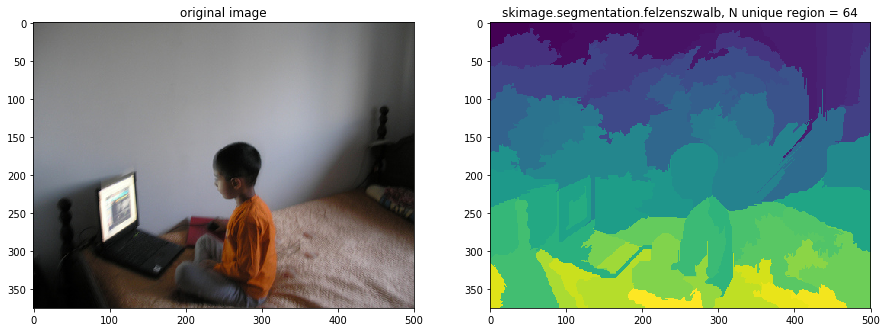

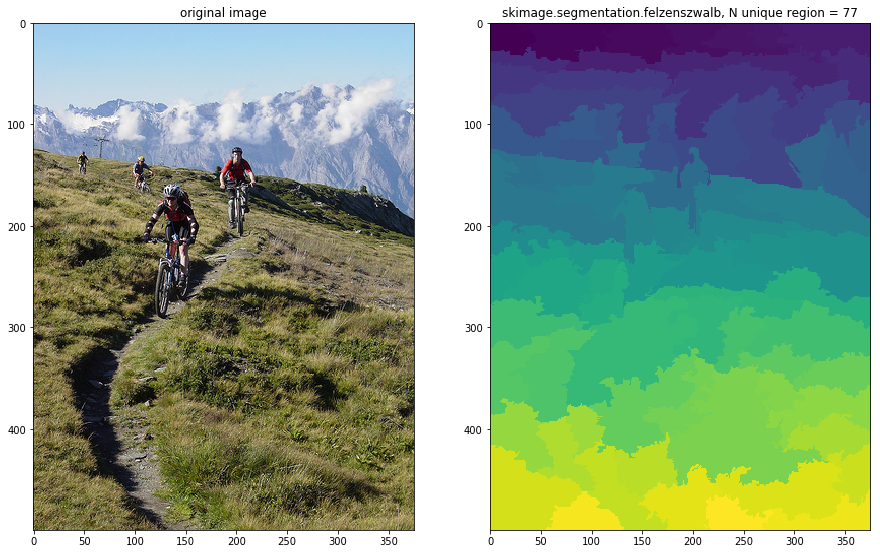

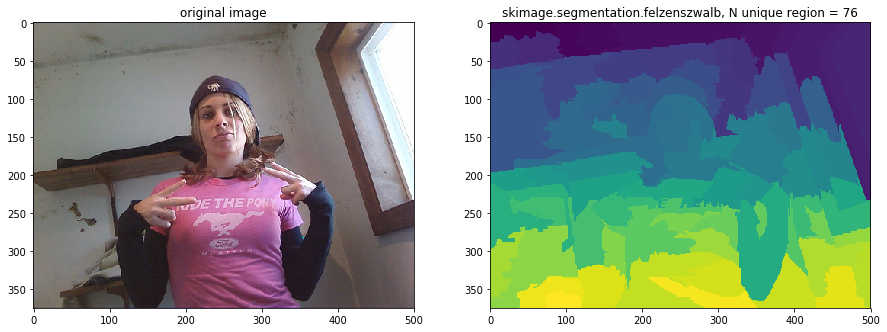

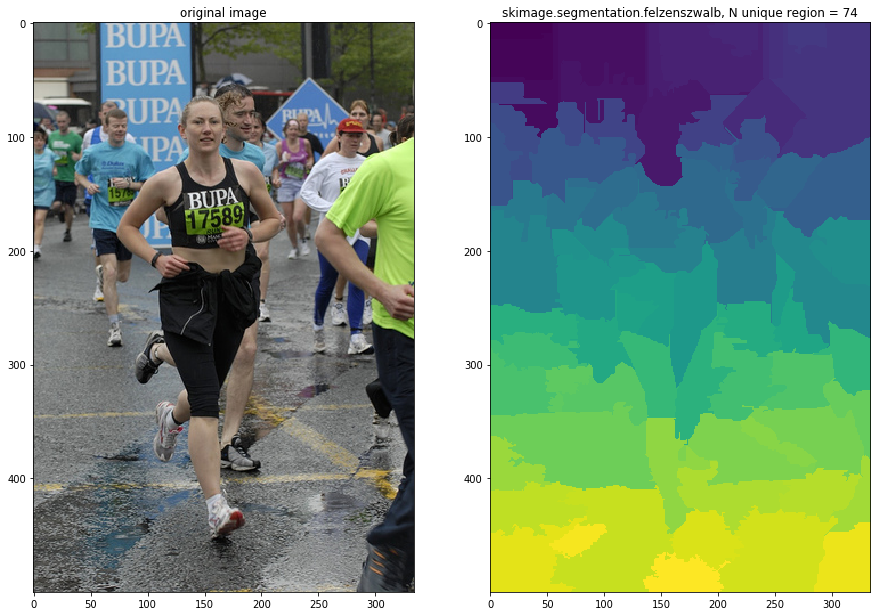

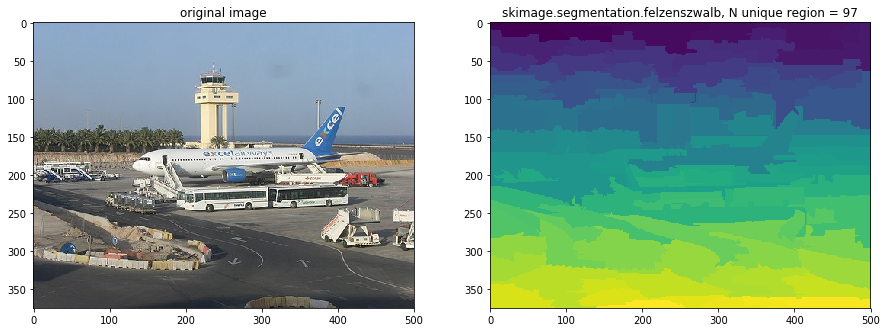

In [7]:
def image_segmentation(img_8bit, scale = 1.0, sigma = 0.8, min_size = 50):
    '''
    J.R.R. Uijlings's hierarchical grouping algorithm 
    
    == input ==
    img_8bit : shape = (height, width, 3),
               8-bits degital image (each digit ranges between 0 - 255)
    
    == output ==
    img      : shape = (height, width, 4)
    '''
    # convert the image to range between 0 and 1
    img_float = skimage.util.img_as_float(img_8bit)
    im_mask   = skimage.segmentation.felzenszwalb(
                    img_float, 
                    scale    = scale, 
                    sigma    = sigma,
                    min_size = min_size)
    img       = np.dstack([img_8bit,im_mask])
    return(img)

scale    = 1.0
sigma    = 0.8
# min_size may be around 50 for better RCNN performance but for the sake of visualization, I will stick to min_size =500
min_size = 500 # 500 3000

np.random.seed(4)
listed_path = os.listdir(img_dir)
Nplot = 5
random_img_path = np.random.choice(listed_path,Nplot)
for imgnm in random_img_path:
    # import 8 bits degital image (each digit ranges between 0 - 255)
    img_8bit  = scipy.misc.imread(os.path.join(img_dir,imgnm))
    img       = image_segmentation(img_8bit, scale, sigma, min_size)
    
    fig = plt.figure(figsize=(15,30))
    ax  = fig.add_subplot(1,2,1)
    ax.imshow(img_8bit)
    ax.set_title("original image")
    ax  = fig.add_subplot(1,2,2)
    ax.imshow(img[:,:,3])
    ax.set_title("skimage.segmentation.felzenszwalb, N unique region = {}".format(len(np.unique(img[:,:,3]))))
    plt.show()

### Extracting Regions for Segmentation

Each region is the smallest rectangle region to cover the whole segmented region.


In [8]:
def extract_region(img):
    '''
    For each segmented region,
    extract smallest rectangle regions covering the smallest segmented region.
    
    == input ==
    img : (height, width, N channel)
          N channel = [R, G, B , L], L = label for the region
          only the L channel is used in this analysis 
    == output ==
    
    dictionary R :
    
    {0: {'labels': [0], 'max_x': 131, 'max_y': 74, 'min_x': 0,   'min_y': 0},
     1: {'labels': [1], 'max_x': 189, 'max_y': 37, 'min_x': 75,  'min_y': 0},
     2: {'labels': [2], 'max_x': 282, 'max_y': 38, 'min_x': 162, 'min_y': 0},
     3: {'labels': [3], 'max_x': 499, 'max_y': 23, 'min_x': 247, 'min_y': 0},
     4: {'labels': [4], 'max_x': 499, 'max_y': 74, 'min_x': 428, 'min_y': 13},
     5: {'labels': [5], 'max_x': 441, 'max_y': 76, 'min_x': 333, 'min_y': 16},
     6: {'labels': [6], 'max_x': 348, 'max_y': 80, 'min_x': 62,  'min_y': 21},
    '''
    ## only use the segmentation output
    img_segment = img[:,:,3]
    R = {}
    for y, i in enumerate(img_segment): ## along vertical axis 

        for x, l in enumerate(i): ## along horizontal axis
            # initialize a new region
            if l not in R:
                R[l] = {"min_x": np.Inf, 
                        "min_y": np.Inf,
                        "max_x": 0, 
                        "max_y": 0, 
                        "labels": [l]}

            # bounding box
            if R[l]["min_x"] > x:
                R[l]["min_x"] = x
            if R[l]["min_y"] > y:
                R[l]["min_y"] = y
            if R[l]["max_x"] < x:
                R[l]["max_x"] = x
            if R[l]["max_y"] < y:
                R[l]["max_y"] = y
    ## remove region if it does not have positive height or positive width
    
    Rcopy = copy(R)
    for key in R.keys():
        r = R[key]
        if (r["min_x"] == r["max_x"]) or (r["min_y"] == r["max_y"]):
            del Rcopy[key]
    return(Rcopy)
R = extract_region(img)
print("{} rectangle regions are found".format(len(R)))

97 rectangle regions are found


### Visualization of initial regions

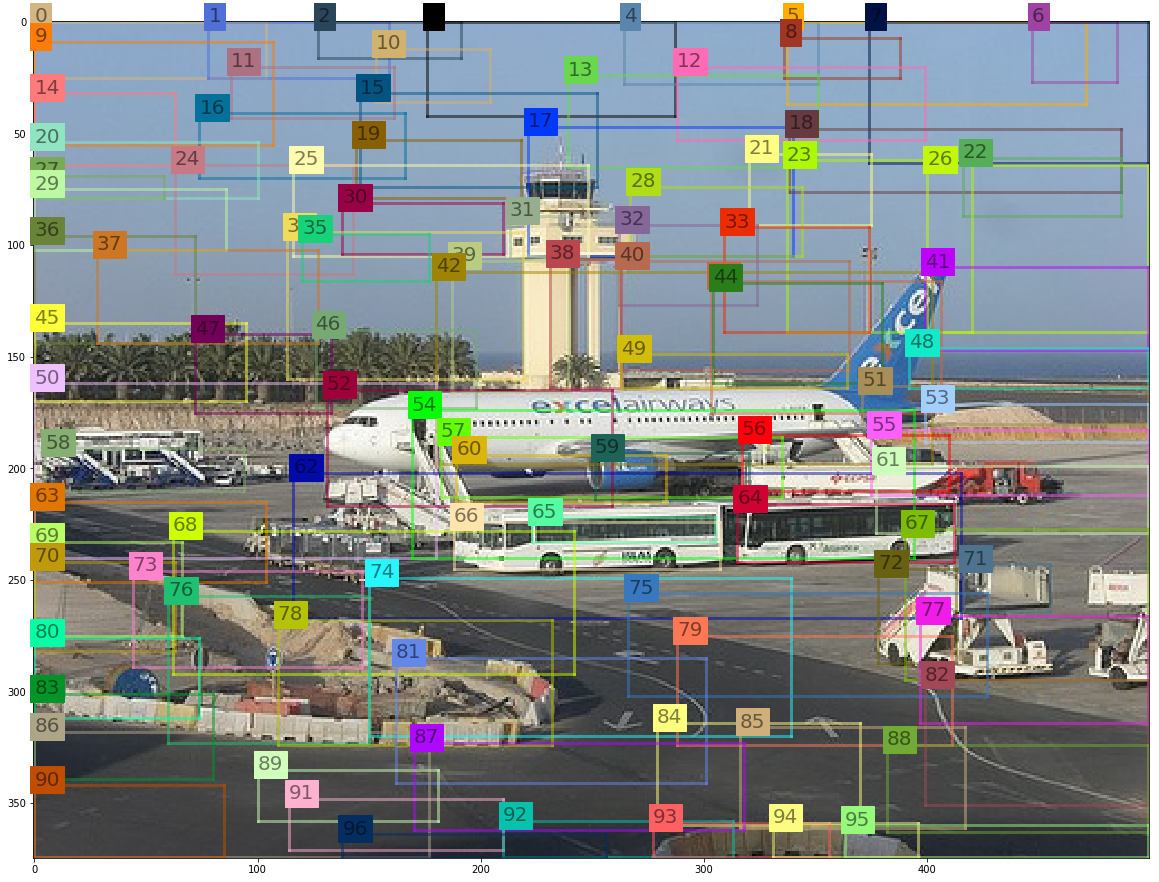

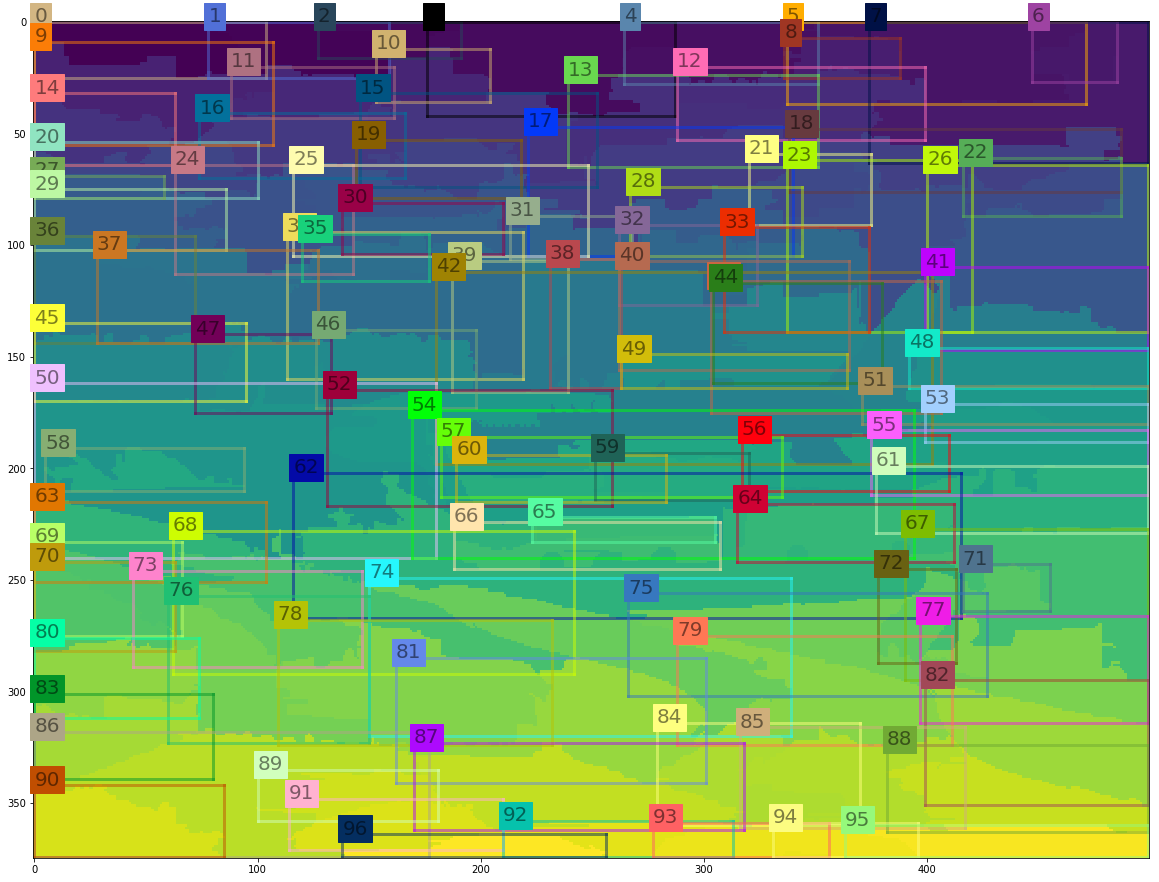

In [9]:
def plt_rectangle(plt,label,x1,y1,x2,y2,color = "yellow", alpha=0.5):
    linewidth = 3
    if type(label) == list:
        linewidth = len(label)*3 + 2
        label = ""
        
    plt.text(x1,y1,label,fontsize=20,backgroundcolor=color,alpha=alpha)
    plt.plot([x1,x1],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x2,x2],[y1,y2], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y1,y1], linewidth=linewidth,color=color, alpha=alpha)
    plt.plot([x1,x2],[y2,y2], linewidth=linewidth,color=color, alpha=alpha)

figsize = (20,20)
plt.figure(figsize=figsize)    
plt.imshow(img[:,:,:3]/2**8)
for item, color in zip(R.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()

plt.figure(figsize=figsize)    
plt.imshow(img[:,:,3])
for item, color in zip(R.values(),sns.xkcd_rgb.values()):
    x1 = item["min_x"]
    y1 = item["min_y"]
    x2 = item["max_x"]
    y2 = item["max_y"]
    label = item["labels"][0]
    plt_rectangle(plt,label,x1,y1,x2,y2,color=color)
plt.show()

---
<a id='step2'></a>
## Step 2: Grouping Regions

### Local Binary Pattern (LBP) texture operator

By calculating LBP features, you can capture the texture similarities between nearby regions.


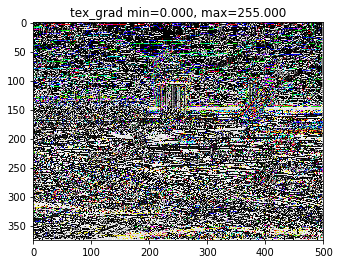

In [10]:
def calc_texture_gradient(img):
    """
        calculate texture gradient for entire image

        The original SelectiveSearch algorithm proposed Gaussian derivative
        for 8 orientations, but we use LBP instead.

        output will be [height(*)][width(*)]
    """
    ret = np.zeros(img.shape[:3])
    for colour_channel in (0, 1, 2):
        ret[:, :, colour_channel] = skimage.feature.local_binary_pattern(
            img[:, :, colour_channel], 8, 1.0)

    return ret


def plot_image_with_min_max(img,nm):
    img = img[:,:,:3]
    plt.imshow(img)
    plt.title("{} min={:5.3f}, max={:5.3f}".format(nm,
                                                   np.min(img),
                                                   np.max(img)))
    plt.show()

tex_grad = calc_texture_gradient(img)   
plot_image_with_min_max(tex_grad,nm="tex_grad")

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


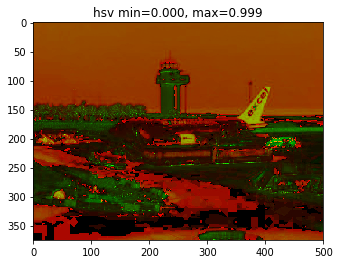

In [11]:
def calc_hsv(img):
    hsv = skimage.color.rgb2hsv(img[:,:,:3])
    return(hsv)

hsv = calc_hsv(img)
plot_image_with_min_max(hsv,nm="hsv")

In [12]:
def calc_hist(img, minhist=0, maxhist=1):
    """
        calculate colour histogram for each region

        the size of output histogram will be BINS * COLOUR_CHANNELS(3)

        number of bins is 25 as same as [uijlings_ijcv2013_draft.pdf]

        extract HSV
        
        len(hist) = BINS * 3
        hist[:BINS] = [0, 10, 20, 0,...,0] meaning that 
           there are 10 pixels that have values between (maxhist - minhist)/BINS*1 and (maxhist - minhist)/BINS*2
           there are 10 pixels that have values between (maxhist - minhist)/BINS*2 and (maxhist - minhist)/BINS*3
    
    """

    BINS = 25
    hist = np.array([])

    for colour_channel in range(3):

        # extracting one colour channel
        c = img[:, colour_channel]

        # calculate histogram for each colour and join to the result
        hist = np.concatenate(
            [hist] + [np.histogram(c, BINS, 
                                   # The lower and upper range of the bins. 
                                   (minhist, maxhist))[0]])

    # L1 normalize
    hist = hist / len(img)
    return hist

def augment_regions_with_histogram_info(tex_grad, img, R,hsv,tex_trad):
    for k, v in list(R.items()):

        ## height and width axies are flattened. 
        ## masked_pixel.shape = (N pixel with this mask ID , 3)
        masked_pixels  = hsv[img[:, :, 3] == k] 
        R[k]["size"]   = len(masked_pixels / 4)
        R[k]["hist_c"] = calc_hist(masked_pixels,minhist=0, maxhist=1)

        # texture histogram
        R[k]["hist_t"] = calc_hist(tex_grad[img[:, :, 3] == k],minhist=0, maxhist=2**8-1)
    return(R)
R = augment_regions_with_histogram_info(tex_grad, img,R,hsv,tex_grad)

In [13]:
def extract_neighbours(regions):
    '''
    check if two regions intersect 
    '''

    def intersect(a, b):
        if (a["min_x"] < b["min_x"] < a["max_x"] and a["min_y"] < b["min_y"] < a["max_y"]) or\
           (a["min_x"] < b["max_x"] < a["max_x"] and a["min_y"] < b["max_y"] < a["max_y"]) or\
           (a["min_x"] < b["min_x"] < a["max_x"] and a["min_y"] < b["max_y"] < a["max_y"]) or\
           (a["min_x"] < b["max_x"] < a["max_x"] and a["min_y"] < b["min_y"] < a["max_y"]):
            return True
        return False

    R = list(regions.items())
    neighbours = []
    for cur, a in enumerate(R[:-1]):
        for b in R[cur + 1:]:
            if intersect(a[1], b[1]):
                neighbours.append((a, b))

    return neighbours

neighbours = extract_neighbours(R)
print("Out of {} regions, we found {} intersecting pairs".format(len(R),len(neighbours)))

Out of 97 regions, we found 277 intersecting pairs


In [15]:
def _sim_colour(r1, r2):
    """
        calculate the sum of histogram intersection of colour
    """
    return sum([min(a, b) for a, b in zip(r1["hist_c"], r2["hist_c"])])


def _sim_texture(r1, r2):
    """
        calculate the sum of histogram intersection of texture
    """
    return sum([min(a, b) for a, b in zip(r1["hist_t"], r2["hist_t"])])


def _sim_size(r1, r2, imsize):
    """
        calculate the size similarity over the image
    """
    return 1.0 - (r1["size"] + r2["size"]) / imsize


def _sim_fill(r1, r2, imsize):
    """
        calculate the fill similarity over the image
    """
    bbsize = (
        (max(r1["max_x"], r2["max_x"]) - min(r1["min_x"], r2["min_x"]))
        * (max(r1["max_y"], r2["max_y"]) - min(r1["min_y"], r2["min_y"]))
    )
    return 1.0 - (bbsize - r1["size"] - r2["size"]) / imsize
def calc_sim(r1, r2, imsize):
    return (_sim_colour(r1, r2)       +\
            _sim_texture(r1, r2)      +\
            _sim_size(r1, r2, imsize) +\
            _sim_fill(r1, r2, imsize))

def calculate_similarlity(img,neighbours,verbose=False):
    # calculate initial similarities
    imsize = img.shape[0] * img.shape[1]
    S = {}
    for (ai, ar), (bi, br) in neighbours:
        S[(ai, bi)] = calc_sim(ar, br, imsize)
        if verbose:
            print("S[({:2.0f}, {:2.0f})]={:3.2f}".format(ai,bi,S[(ai, bi)]))
    return(S)

print("S[(Pair of the intersecting regions)] = Similarity index")
S = calculate_similarlity(img,neighbours,verbose=True)

S[(Pair of the intersecting regions)] = Similarity index
S[( 0, 11)]=7.41
S[( 1,  2)]=7.41
S[( 1,  9)]=7.58
S[( 1, 10)]=6.92
S[( 1, 11)]=7.43
S[( 2, 10)]=6.67
S[( 3,  4)]=7.42
S[( 3, 10)]=7.20
S[( 3, 13)]=6.71
S[( 3, 15)]=6.66
S[( 4,  8)]=7.69
S[( 4, 12)]=7.57
S[( 5,  6)]=7.68
S[( 5,  8)]=7.65
S[( 5, 12)]=7.60
S[( 5, 13)]=6.66
S[( 7,  8)]=6.88
S[( 7, 12)]=7.09
S[( 7, 18)]=7.40
S[( 7, 21)]=7.45
S[( 7, 22)]=7.37
S[( 7, 23)]=6.90
S[( 8, 13)]=6.71
S[( 9, 11)]=7.58
S[( 9, 14)]=6.84
S[( 9, 16)]=6.71
S[( 9, 20)]=6.81
S[(10, 11)]=6.98
S[(11, 15)]=6.84
S[(12, 13)]=6.82
S[(12, 17)]=6.64
S[(12, 18)]=6.78
S[(13, 15)]=7.48
S[(13, 17)]=7.14
S[(13, 18)]=7.57
S[(13, 21)]=7.56
S[(13, 23)]=6.90
S[(13, 25)]=7.10
S[(15, 16)]=7.43
S[(15, 17)]=7.34
S[(15, 19)]=7.44
S[(15, 25)]=7.36
S[(16, 19)]=7.69
S[(16, 20)]=7.66
S[(16, 24)]=7.10
S[(16, 25)]=7.04
S[(17, 18)]=7.27
S[(17, 21)]=7.15
S[(17, 23)]=7.25
S[(17, 25)]=7.53
S[(17, 28)]=6.87
S[(17, 31)]=5.58
S[(17, 32)]=6.66
S[(17, 33)]=6.72
S[(18, 21)]=7.62
S[(18, 2

The more they are merged, the thicker the bounding boxes get.

In [16]:
def merge_regions(r1, r2):
    '''
    Suppose r1 and r2 look like: 
    
    (minx1, miny1)
          _____________________
          |                   |
          |     (minx2,maxy2) |
          |           ________|____ 
          |          |        |    |
          |          |        |    |
          |          |________|____|(maxx2, maxy2)
          |___________________|(maxx1, maxy1)
          
    Then for merged region,
    
    minx : minx1
    miny : miny1
    maxx : maxx2
    maxy : maxy1 
    size : the number of pixels in the two regions (intersection is counted twice?)
    
                         
    '''
    new_size = r1["size"] + r2["size"]
    rt = {
        "min_x": min(r1["min_x"], r2["min_x"]),
        "min_y": min(r1["min_y"], r2["min_y"]),
        "max_x": max(r1["max_x"], r2["max_x"]),
        "max_y": max(r1["max_y"], r2["max_y"]),
        "size": new_size,
        "hist_c": (r1["hist_c"] * r1["size"] + r2["hist_c"] * r2["size"]) / new_size,
        "hist_t": (r1["hist_t"] * r1["size"] + r2["hist_t"] * r2["size"]) / new_size,
        "labels": r1["labels"] + r2["labels"]
    }
    return rt

def merge_regions_in_order(S,R,imsize, verbose=False):
    '''
    == Input ==
    S : similarity dictionary
    
    R : dictionary of proposed regions
    
    == Output ==
    
    regions : list of regions
    
    '''
    # hierarchal search
    while S != {}:

        # Step 1: get highest similarity pair of regions from the similarlity dictionary
        i, j = sorted(S.items(), key=lambda i: i[1])[-1][0]

        # Step 2: marge the region pair and add to the region dictionary
        t = max(R.keys()) + 1.0
        R[t] = merge_regions(R[i], R[j])

        # Step 3: from the similarity dictionary, 
        #         remove all the pair of regions where one of the regions is selected in Step 1
        key_to_delete = []
        for k, v in list(S.items()):
            if (i in k) or (j in k):
                key_to_delete.append(k)
        for k in key_to_delete:
            del S[k]

        # Step 4: calculate similarity with new merged region and the regions and its intersecting region
        #         (intersecting region is the region that are to be deleted)
        for k in key_to_delete:
            if k != (i,j):
                if k[0] in (i, j):
                    n = k[1]
                else:
                    n = k[0]
                S[(t, n)] = calc_sim(R[t], R[n], imsize)
    if verbose:
        print("{} regions".format(len(R)))

    ## finally return list of region proposal
    regions = []
    for k, r in list(R.items()):
            regions.append({
                'rect': (
                    r['min_x'],              # min x
                    r['min_y'],              # min y
                    r['max_x'] - r['min_x'], # width 
                    r['max_y'] - r['min_y']),# height
                'size': r['size'],
                'labels': r['labels']
            })
    return(regions)



regions = merge_regions_in_order(S,R,img.shape[0]*img.shape[1],verbose=True)

193 regions


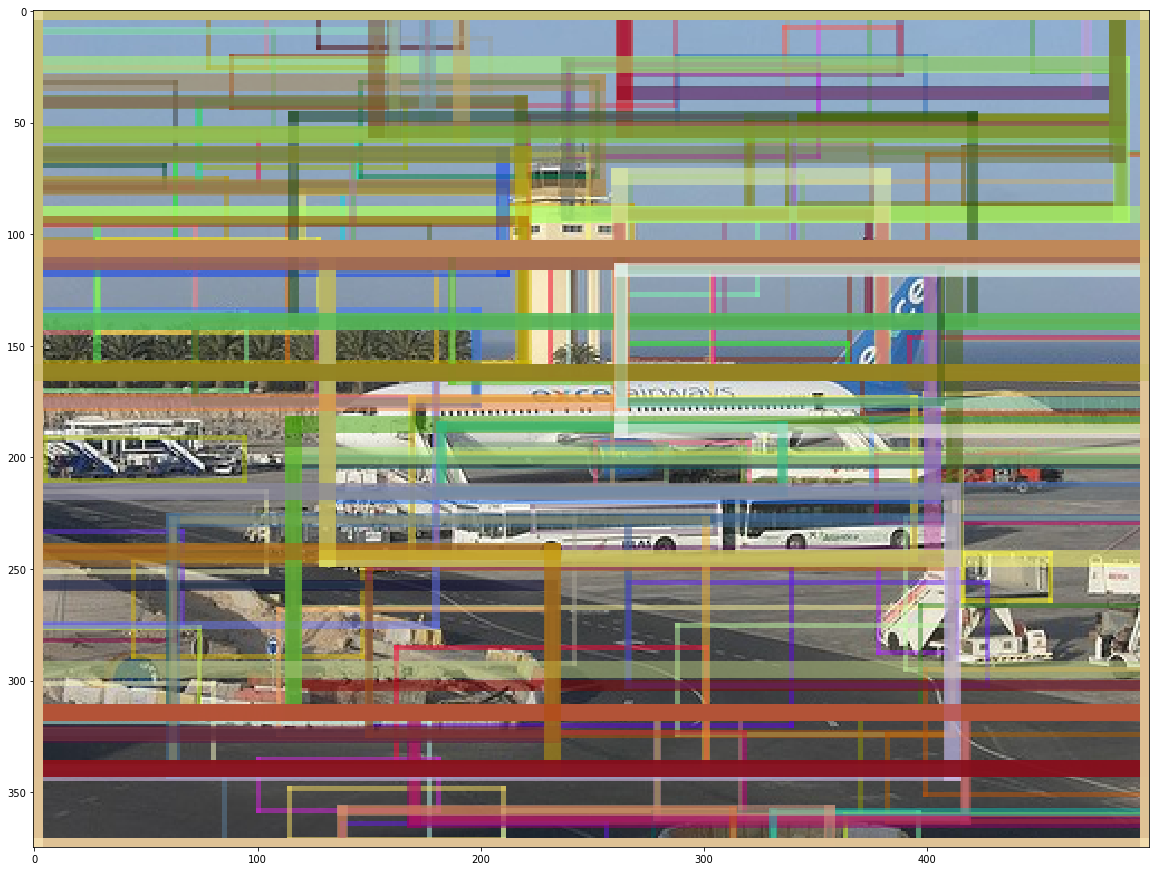

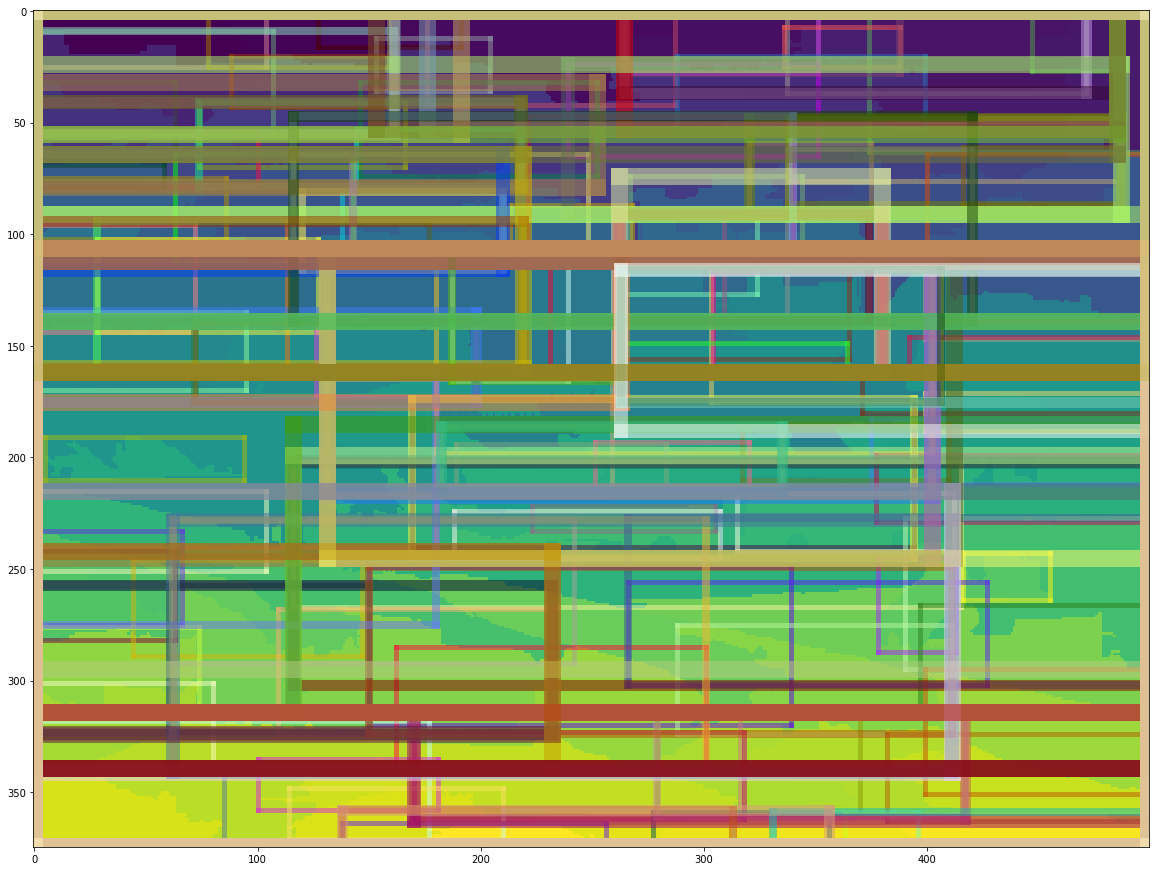

In [22]:
plt.figure(figsize=(20,20))    
plt.imshow(img[:,:,:3]/2**8)
for item, color in zip(regions,sns.xkcd_rgb.values()):
    x1, y1, width, height = item["rect"]
    label = item["labels"][:5]
    plt_rectangle(plt,label,x1,y1,x2 = x1 + width,y2 = y1 + height, color = color)
plt.show()

plt.figure(figsize=(20,20))    
plt.imshow(img[:,:,3])
for item, color in zip(regions,sns.xkcd_rgb.values()):
    x1, y1, width, height = item["rect"]
    label = item["labels"][:5]
    plt_rectangle(plt,label,
                  x1,
                  y1,
                  x2 = x1 + width,
                  y2 = y1 + height, color= color)
plt.show()

Combine all the functions.

In [17]:
def get_region_proposal(img_8bit,min_size = 500):
    img        = image_segmentation(img_8bit,min_size = min_size)
    R          = extract_region(img)    
    tex_grad   = calc_texture_gradient(img)
    hsv        = calc_hsv(img)
    R          = augment_regions_with_histogram_info(tex_grad, img, R,hsv,tex_grad)
    del tex_grad, hsv
    neighbours = extract_neighbours(R)
    S          = calculate_similarlity(img,neighbours)
    regions    = merge_regions_in_order(S,R,imsize = img.shape[0] * img.shape[1])
    return(regions)
regions = get_region_proposal(img_8bit,min_size=500)

regions
print("{} regions are found".format(len(regions)))

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


193 regions are found


---
<a id='step2'></a>
## Step 2: CNN Feature Extraction - Transfer Learning

### Obtaining Bottleneck Features



In [18]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image                  
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from extract_bottleneck_features import *
import numpy as np
import pandas as pd
import os, sys 
import scipy.misc
import matplotlib.pyplot as plt
import random
import imageio
import skimage

Using TensorFlow backend.


In [19]:
bottleneck_features = np.load('/home/ubuntu/VOCdevkit/Resnet50Data.npz')
train_res = bottleneck_features['train']
valid_res = bottleneck_features['valid']
test_res = bottleneck_features['test']

In [20]:
modelRes=ResNet50(include_top=True,weights='imagenet')
modelRes.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_1[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

### Warping the regions
The input layer of the Resnet50 requires that image size of 224 * 224.<br>
We need to warp the images after selective search into a compatible form.

In [21]:
import selective_search as ss

img_dir   = "VOC2012/JPEGImages"
imgnm     = "2007_000032.jpg"

# import 8 bits degital image (each digit ranges between 0 - 255)
img_8bit  = imageio.imread(os.path.join(img_dir,imgnm))
## region proposal codes 
regions  = ss.get_region_proposal(img_8bit,min_size=50)
print("{} candidate regions are proposed.".format(len(regions)))

/usr/local/lib/python3.5/dist-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


1569 candidate regions are proposed.


### Visualizing the warped images

Random 5 pictures will be chosen for demonstration

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


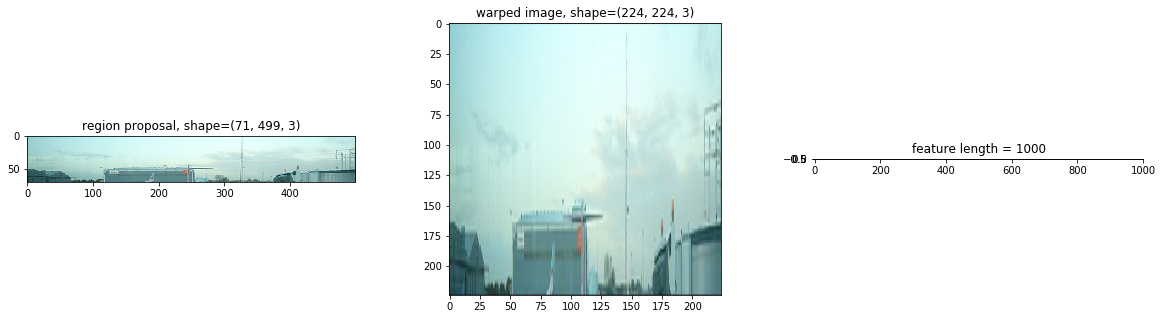

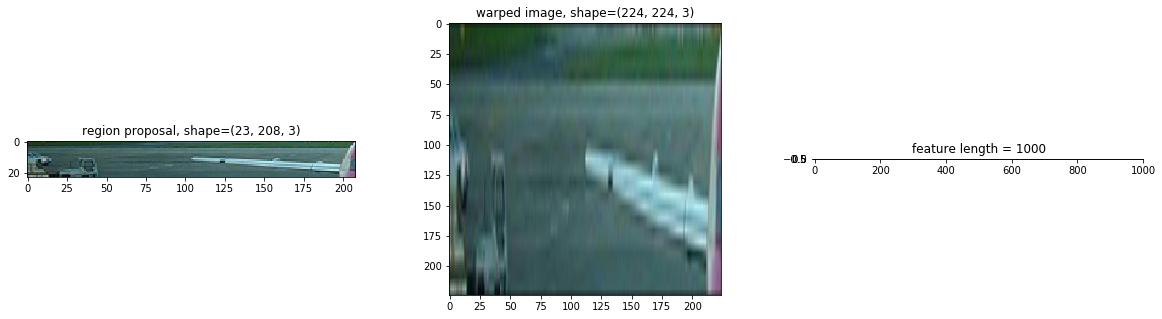

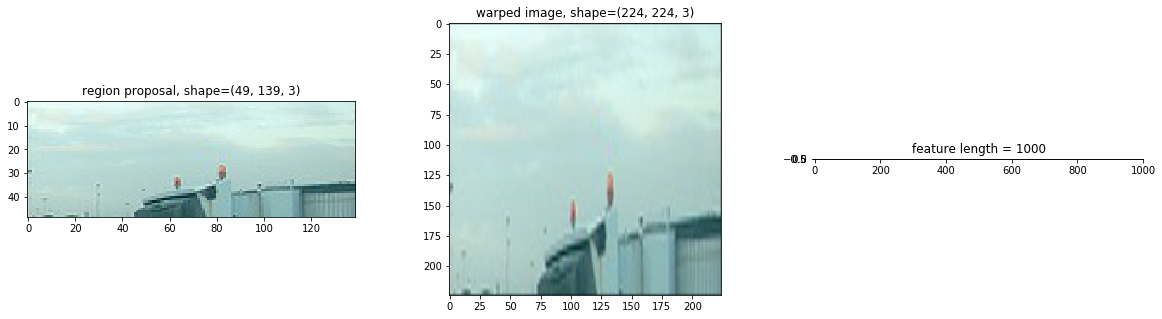

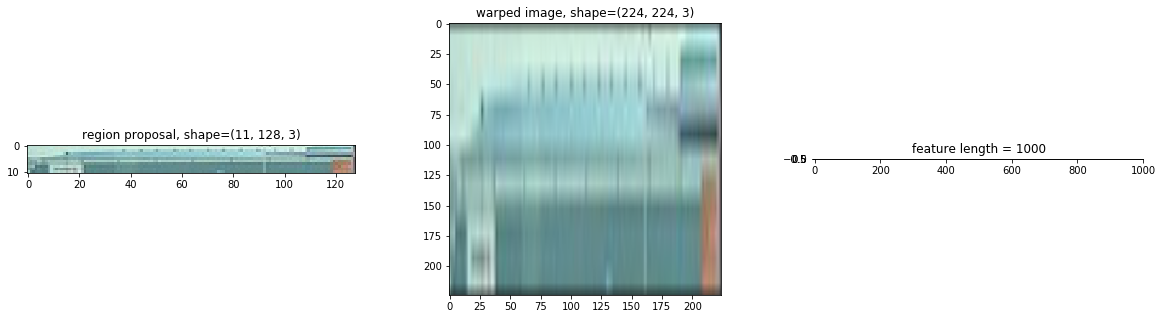

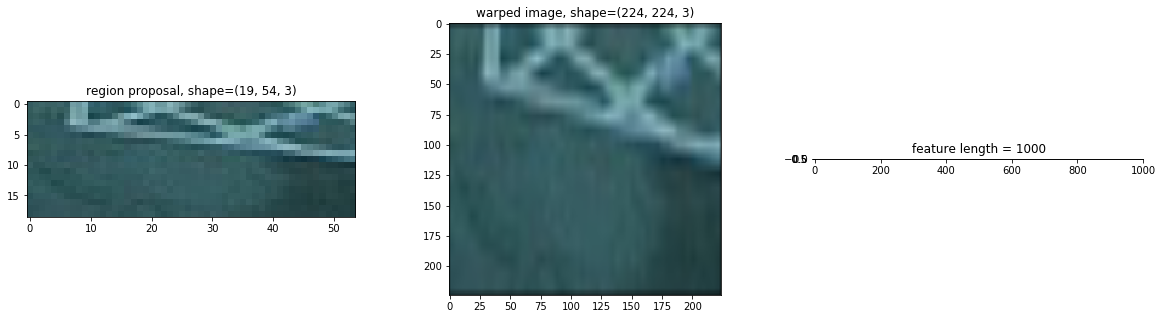

In [22]:
def warp(img, newsize):
    '''
    warp image 
    
    
    img     : np.array of (height, width, Nchannel)
    newsize : (height, width)
    '''
    img_resize = skimage.transform.resize(img,newsize)
    return(img_resize)


warped_size = (224, 224)
X = []
for i in [1511,1252,1245,1305,666]:
    r = regions[i]
    ## extract a single candidate region
    x , y , width, height = r["rect"]
    img_bb     = img_8bit[y:y + height,x:x + width]
    ## warp image
    img_warped = warp(img_bb, warped_size)
    ## create CNN feature
    feature = modelRes.predict(img_warped.reshape(1,warped_size[0],warped_size[1],3))
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_bb)
    ax.set_title("region proposal, shape={}".format(img_bb.shape))
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(img_warped)
    ax.set_title("warped image, shape={}".format(img_warped.shape))

    ax = fig.add_subplot(1,3,3)    
    ax.imshow(feature, cmap='hot')
    ax.set_title("feature length = {}".format(len(feature.flatten())))
    plt.show()

### Ground Truth Label for each Candidate Region

Read in the annotation CSV file.

In [23]:
# location to save df_anno.csv
import pandas as pd
dir_preprocessed = "/home/ubuntu/VOCdevkit/VOC2012/"
df_anno = pd.read_csv(os.path.join(dir_preprocessed,"df_anno.csv"))

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
cols_bbx = []
for colnm in df_anno.columns:
    if "name" in colnm:
        cols_bbx.append(colnm)
bbx_has_personTF = df_anno[cols_bbx].values == "person"
pick = np.any(bbx_has_personTF,axis=1)
df_anno_person = df_anno.loc[pick,:]

In [25]:
import pickle
IoU_cutoff_object     = 0.7
IoU_cutoff_not_object = 0.4
objnms = ["image0","info0","image1","info1"]  
dir_result = "result"

In [26]:
import time 
start = time.time()   
# the "rough" ratio between the region candidate with and without objects.
N_img_without_obj = 2 
newsize = (300,400) ## hack
image0, image1, info0,info1 = [], [], [], [] 
for irow in range(df_anno_person.shape[0]):
    ## extract a single frame that contains at least one person object
    row  = df_anno_person.iloc[irow,:]
    ## read in the corresponding frame
    path = os.path.join(img_dir,row["fileID"] + ".jpg")
    img  = imageio.imread(path)
    orig_h, orig_w, _ = img.shape
    ## to reduce the computation speed,
    ## I will do a small hack here. I will resize all the images into newsize = (200,250)    
    img  = warp(img, newsize)
    orig_nh, orig_nw, _ = img.shape
    ## region candidates for this frame
    regions = ss.get_region_proposal(img,min_size=50)[::-1]
    
    ## for each object that exists in the data,
    ## find if the candidate regions contain the person
    for ibb in range(row["Nobj"]): 

        name = row["bbx_{}_name".format(ibb)]
        if name != "person": ## if this object is not person, move on to the next object
            continue 
        if irow % 50 == 0:
            print("frameID = {:04.0f}/{}, BBXID = {:02.0f},  N region proposals = {}, N regions with an object gathered till now = {}".format(
                    irow, df_anno_person.shape[0], ibb, len(regions), len(image1)))
        
        ## extract the bounding box of the person object  
        multx, multy  = orig_nw/orig_w, orig_nh/orig_h 
        true_xmin     = row["bbx_{}_xmin".format(ibb)]*multx
        true_ymin     = row["bbx_{}_ymin".format(ibb)]*multy
        true_xmax     = row["bbx_{}_xmax".format(ibb)]*multx
        true_ymax     = row["bbx_{}_ymax".format(ibb)]*multy
        
        
        person_found_TF = 0
        _image1 = None
        _image0, _info0  = [],[]
        ## for each candidate region, find if this person object is included
        for r in regions:
            
            prpl_xmin, prpl_ymin, prpl_width, prpl_height = r["rect"]
            ## calculate IoU between the candidate region and the object
            IoU = ss.get_IOU(prpl_xmin, prpl_ymin, prpl_xmin + prpl_width, prpl_ymin + prpl_height,
                             true_xmin, true_ymin, true_xmax, true_ymax)
            ## candidate region numpy array
            img_bb = np.array(img[prpl_ymin:prpl_ymin + prpl_height,
                                  prpl_xmin:prpl_xmin + prpl_width])
            
            info = [irow, prpl_xmin, prpl_ymin, prpl_width, prpl_height]
            if IoU > IoU_cutoff_object:
                _image1 = img_bb
                _info1  = info
                break
            elif IoU < IoU_cutoff_not_object:
                _image0.append(img_bb) 
                _info0.append(info) 
        if _image1 is not None:
            # record all the regions with the objects
            image1.append(_image1)
            info1.append(_info1)
            if len(_info0) >= N_img_without_obj: ## record only 2 regions without objects
                # downsample the candidate regions without object 
                # so that the training does not have too much class imbalance. 
                # randomly select N_img_without_obj many frames out of all the sampled images without objects.
                pick = np.random.choice(np.arange(len(_info0)),N_img_without_obj)
                image0.extend([_image0[i] for i in pick ])    
                info0.extend( [_info0[i]  for i in pick ])  

        
end = time.time()  
print("TIME TOOK : {}MIN".format((end-start)/60))

### Save image0, info0, image1, info1 
objs   = [image0,info0,image1,info1]        
for obj, nm in zip(objs,objnms):
    with open(os.path.join(dir_result ,'{}.pickle'.format(nm)), 'wb') as handle:
        pickle.dump(obj, 
                    handle, protocol=pickle.HIGHEST_PROTOCOL)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


frameID = 0000/9583, BBXID = 00,  N region proposals = 1108, N regions with an object gathered till now = 0
frameID = 0000/9583, BBXID = 01,  N region proposals = 1108, N regions with an object gathered till now = 0
frameID = 0000/9583, BBXID = 02,  N region proposals = 1108, N regions with an object gathered till now = 1
frameID = 0000/9583, BBXID = 03,  N region proposals = 1108, N regions with an object gathered till now = 2
frameID = 0050/9583, BBXID = 00,  N region proposals = 1206, N regions with an object gathered till now = 27
frameID = 0050/9583, BBXID = 01,  N region proposals = 1206, N regions with an object gathered till now = 27
frameID = 0100/9583, BBXID = 02,  N region proposals = 955, N regions with an object gathered till now = 53
frameID = 0150/9583, BBXID = 02,  N region proposals = 1236, N regions with an object gathered till now = 72
frameID = 0200/9583, BBXID = 00,  N region proposals = 1121, N regions with an object gathered till now = 100
frameID = 0250/9583, BB

frameID = 2250/9583, BBXID = 00,  N region proposals = 1079, N regions with an object gathered till now = 1104
frameID = 2300/9583, BBXID = 00,  N region proposals = 1157, N regions with an object gathered till now = 1129
frameID = 2300/9583, BBXID = 01,  N region proposals = 1157, N regions with an object gathered till now = 1130
frameID = 2300/9583, BBXID = 02,  N region proposals = 1157, N regions with an object gathered till now = 1131
frameID = 2300/9583, BBXID = 03,  N region proposals = 1157, N regions with an object gathered till now = 1132
frameID = 2350/9583, BBXID = 00,  N region proposals = 1146, N regions with an object gathered till now = 1158
frameID = 2350/9583, BBXID = 01,  N region proposals = 1146, N regions with an object gathered till now = 1158
frameID = 2400/9583, BBXID = 03,  N region proposals = 1155, N regions with an object gathered till now = 1181
frameID = 2400/9583, BBXID = 04,  N region proposals = 1155, N regions with an object gathered till now = 1181
f

frameID = 4050/9583, BBXID = 02,  N region proposals = 1240, N regions with an object gathered till now = 2021
frameID = 4050/9583, BBXID = 03,  N region proposals = 1240, N regions with an object gathered till now = 2021
frameID = 4100/9583, BBXID = 00,  N region proposals = 1239, N regions with an object gathered till now = 2044
frameID = 4150/9583, BBXID = 00,  N region proposals = 1185, N regions with an object gathered till now = 2070
frameID = 4200/9583, BBXID = 04,  N region proposals = 1224, N regions with an object gathered till now = 2099
frameID = 4250/9583, BBXID = 00,  N region proposals = 1126, N regions with an object gathered till now = 2125
frameID = 4300/9583, BBXID = 00,  N region proposals = 1059, N regions with an object gathered till now = 2149
frameID = 4350/9583, BBXID = 00,  N region proposals = 1073, N regions with an object gathered till now = 2172
frameID = 4400/9583, BBXID = 04,  N region proposals = 1231, N regions with an object gathered till now = 2200
f

KeyboardInterrupt: 

plot warped cadidate regions with a person object intraining 


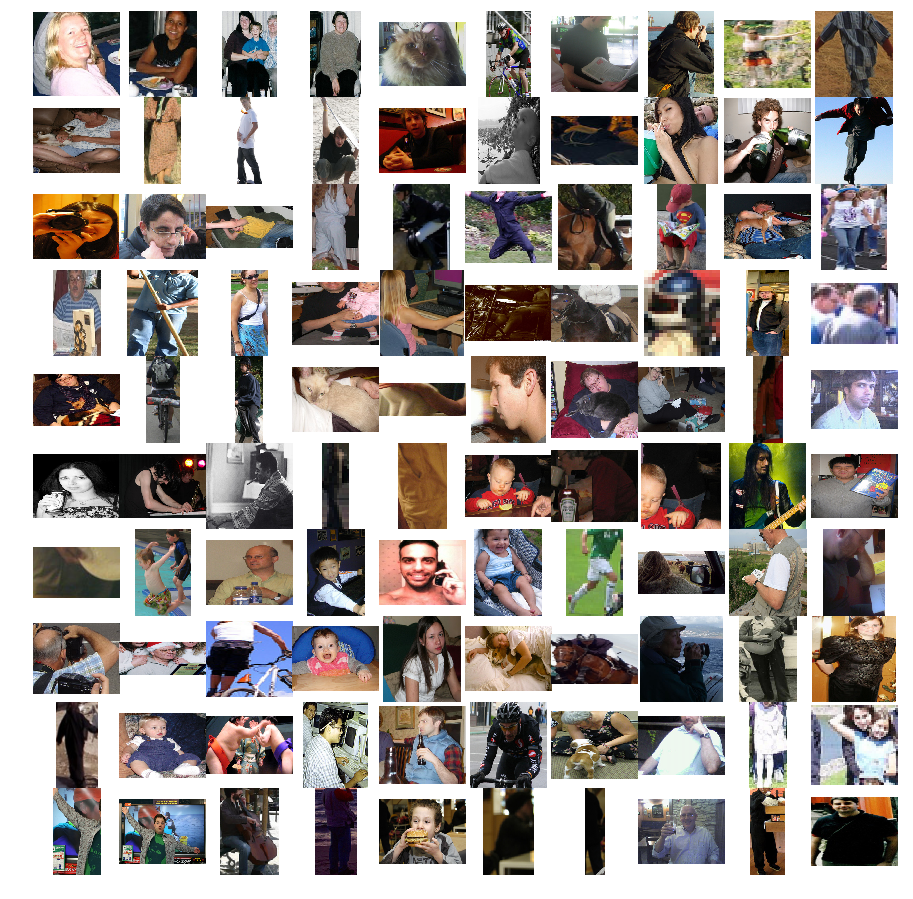

plot warped cadidate regions without a person object intraining 


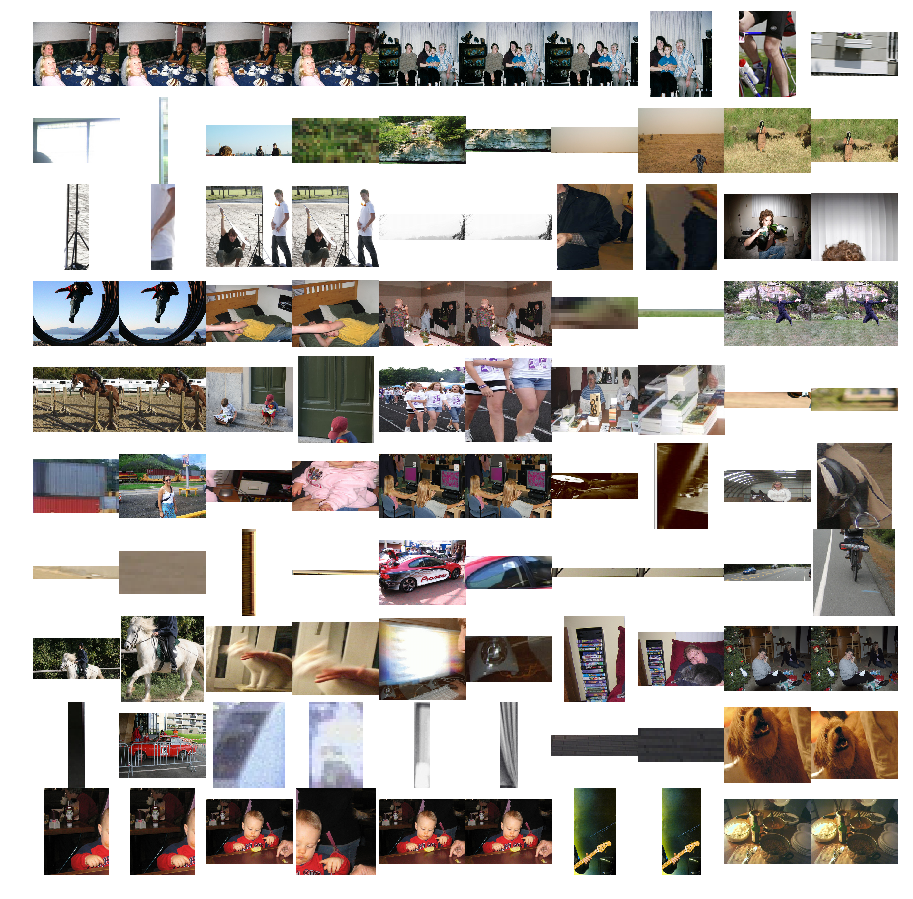

In [27]:
def plot_cadidate_regions_in_training(image1,title):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(hspace=0.0001,
                        wspace=0.0001,
                        left=0,right=1,bottom=0, top=1)
    print(title)
    nw, nh = 10, 10
    count = 1
    for irow in range(100):#np.random.choice(len(image1),nw*nh):
        im  = image1[irow]
        ax  = fig.add_subplot(nh,nw,count)
        ax.imshow(im)
        ax.axis("off")
        count += 1
    plt.show()
plot_cadidate_regions_in_training(image1,title="plot warped cadidate regions with a person object intraining ")
plot_cadidate_regions_in_training(image0,title="plot warped cadidate regions without a person object intraining ")